In [56]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
from sklearn.metrics import pairwise

from tqdm import tqdm

In [3]:
DATA_DIR = 'data'

In [4]:
try:
    os.mkdir(os.path.join(DATA_DIR, 'preprocess'))
    os.mkdir(os.path.join(DATA_DIR, 'preprocess', 'training'))
    os.mkdir(os.path.join(DATA_DIR, 'preprocess', 'testing'))
except:
    pass

In [5]:
train_files = glob.glob(os.path.join(DATA_DIR, 'training', 'training', '*.png'))

In [6]:
def preprocess_image(filename):
    im = cv2.imread(filename)
    imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(imgray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours_ = list(filter(lambda c: len(c) > 10, contours))
    
    new_image = np.zeros((300, 300, 3), np.float32)
    new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
    new_image = cv2.fillPoly(new_image, pts = contours_, color=(255))
    
    return new_image

In [16]:
for file in tqdm(train_files):
    im = preprocess_image(file)
    out_dir = os.path.join(DATA_DIR, 'preprocess', 'training')
    
    cv2.imwrite(os.path.join(out_dir, file.split('\\')[-1]), im)

100%|█████████████████████████████████████████████████████████████████████████████| 2313/2313 [00:19<00:00, 119.05it/s]


In [12]:
def get_keypoints(filename):
    img = cv2.imread(filename)
    img = cv2.resize(img, (416, 416))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    sift = cv2.SIFT_create()
    
    return sift.detectAndCompute(gray, None)

In [17]:
preprocess_files = glob.glob(os.path.join(DATA_DIR, 'preprocess', 'training', '*.png'))

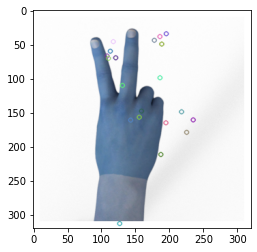

In [82]:
filename = train_files[6]

kp, des = get_keypoints(filename)
img = cv2.imread(filename)


plt.imshow(cv2.drawKeypoints(img, kp, None))
plt.show()

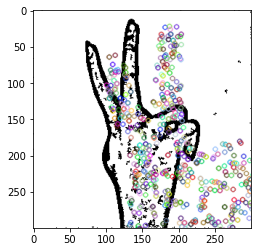

In [152]:

def count_fingers(filename):

    img = cv2.imread(filename)
    img = cv2.copyMakeBorder(img, 10, 10, 10, 10, cv2.BORDER_CONSTANT, None, value = (255, 255, 255))

    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _,img=cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    cont,hie=cv2.findContours(img,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    img2 = img.copy()

    con= sorted(cont,key=cv2.contourArea)[-2]


    conv_hull= cv2.convexHull(con)
    cv2.drawContours(img, [conv_hull],-1,150,3)
    
    
    top=tuple(conv_hull[conv_hull[:,:,1].argmin()][0])
    bottom=tuple(conv_hull[conv_hull[:,:,1].argmax()][0])
    left=tuple(conv_hull[conv_hull[:,:,0].argmin()][0])
    right=tuple(conv_hull[conv_hull[:,:,0].argmax()][0])
    cx=(left[0]+right[0])//2
    cy=(top[1]+bottom[1])//2

    dist=pairwise.euclidean_distances([left,right,bottom,top],[[cx,cy]])[0]
    radi=int(0.8*dist)

    circular_roi=np.zeros_like(img,dtype='uint8')
    cv2.circle(circular_roi,(cx,cy),radi,255,8)
    wighted=cv2.addWeighted(img.copy(),0.6,circular_roi,0.4,2)

    mask=cv2.bitwise_and(img2,img2,mask=circular_roi)
    
    plt.imshow(cv2.addWeighted(img.copy(),0.6,circular_roi,0.4,2))
    plt.show()
    
    con,hie=cv2.findContours(mask.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    count=0
    circumfrence=2*np.pi*radi
    for cnt in con:
        (m_x,m_y,m_w,m_h)=cv2.boundingRect(cnt)
        out_wrist_range=(cy+(cy*0.25))>(m_y+m_h)
        limit_pts=(circumfrence*0.25)>cnt.shape[0]
        if limit_pts and out_wrist_range:
            count+=1
            
    return count

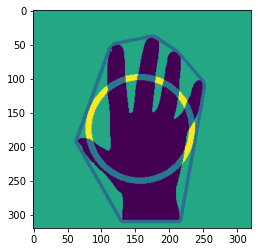

Fingers: 3


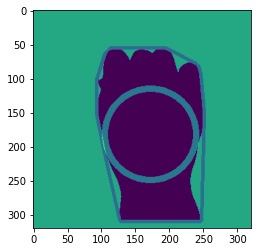

Fingers: 5


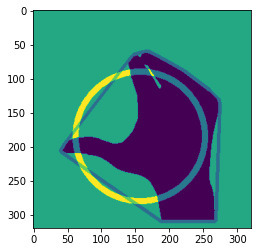

Fingers: 1


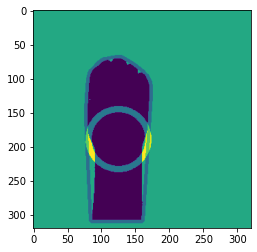

Fingers: 0


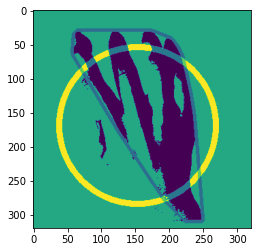

Fingers: 3


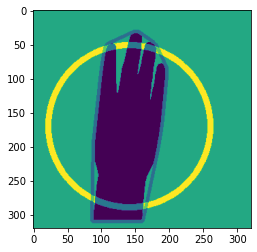

Fingers: 2


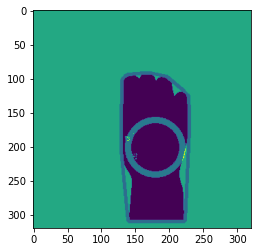

Fingers: 6


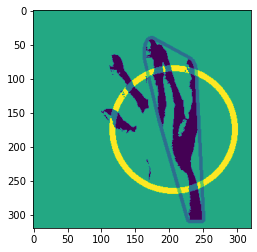

Fingers: 7


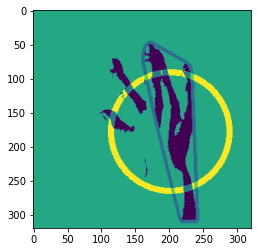

Fingers: 6


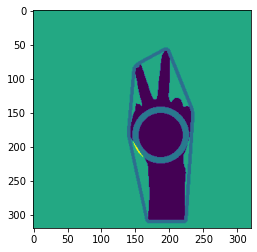

Fingers: 1


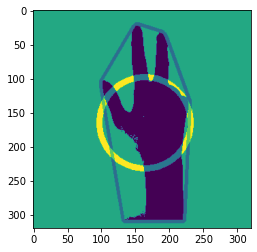

Fingers: 3


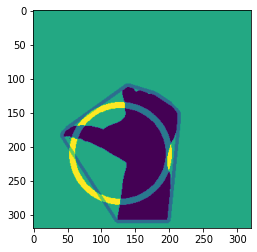

Fingers: 1


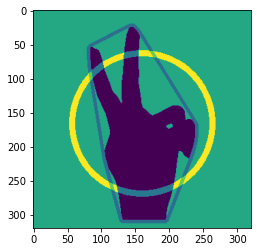

Fingers: 1


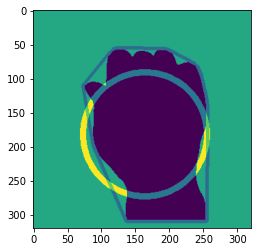

Fingers: 1


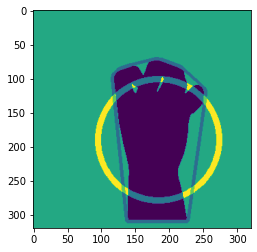

Fingers: 3


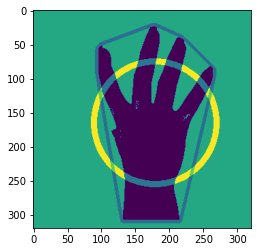

Fingers: 3


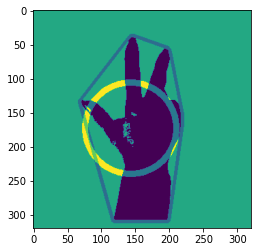

Fingers: 4


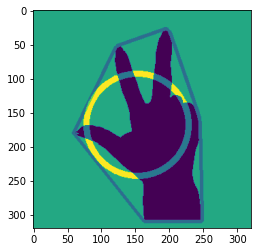

Fingers: 2


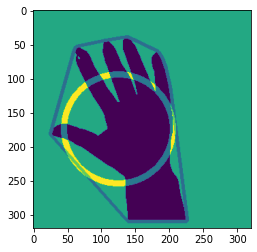

Fingers: 3


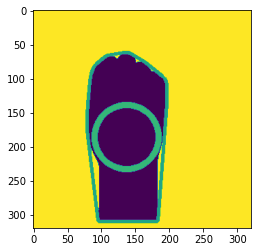

Fingers: 0


In [156]:

for i in range(10, 30):
    n_fingers = count_fingers(train_files[i])
    
    img = cv2.imread(train_files[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    print(f"Fingers: {n_fingers}")
    
    plt.show()



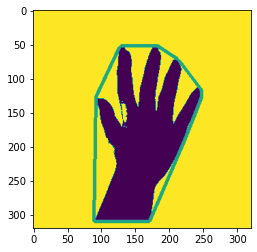

In [138]:
plt.imshow(img)

In [141]:
count

4

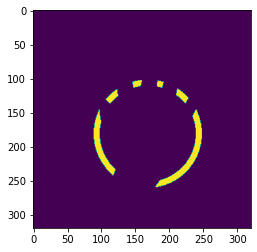

In [142]:
plt.imshow(cv2.bitwise_and(img2,img2,mask=circular_roi))